<a href="https://colab.research.google.com/github/gustavomirapalheta/Quantum-Computing-with-Qiskit/blob/trabalho_2021_09_29/QML_qiskit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instalação do Pacote Qiskit

No caso do ambiente Google Colab, o pacote Qiskit deve ser instalado toda vez que a sessão for inicializada. Para tal vamos usar o comando Linux `pip`. Comandos do ambiente ambiente Linux são executados a partir das células do colab precedendo os mesmos por um ponto de exclamação (`!`). A opção `-q` executa o comando de forma silenciosa.

In [ ]:
!pip install qiskit -q 

     |████████████████████████████████| 6.0MB 14.3MB/s 
     |████████████████████████████████| 18.0MB 227kB/s 
     |████████████████████████████████| 235kB 34.6MB/s 
     |████████████████████████████████| 215kB 49.0MB/s 
     |████████████████████████████████| 2.1MB 32.3MB/s 
     |████████████████████████████████| 1.5MB 24.8MB/s 
     |████████████████████████████████| 51kB 6.4MB/s 
     |████████████████████████████████| 194kB 48.2MB/s 
     |████████████████████████████████| 112kB 50.7MB/s 
     |████████████████████████████████| 614kB 46.3MB/s 
     |████████████████████████████████| 3.2MB 41.1MB/s 
     |████████████████████████████████| 6.3MB 28.9MB/s 
ERROR: qiskit-aqua 0.9.1 has requirement retworkx<=0.8.0,>=0.7.0, but you'll have retworkx 0.9.0 which is incompatible.


# Meu primeiro programa com Qubits

O objetivo deste documento é demonstrar a execução de um pequeno programa baseado em Qubits. O programa será projetado na forma de um circuito com portas lógicas quânticas. 

Utilizaremos a linguagem Qiskit da IBM. Esta linguagem pode ser utilizada a partir de um programa Python. O nosso programa Python foi criado em um Jupyter Notebook no ambiente Google Colab.


Uma vez que o pacote esteja instalado podemos carrega-lo no nosso ambiente Python. O comando abaixo carrega (importa) o pacote `qiskit` para o ambiente Python e atribuiu ao mesmo o nome (apelido) `qk`

In [ ]:
import qiskit as qk

Nosso circuito será composto de dois Qubits, os quais serão inicializados no estado $|{0}\rangle$. 

O primeiro Qubit passará por um Hadamart gate (colocando-o em sobreposição dos estados $|{0}\rangle$ e $|{1}\rangle$. 

Em seguida é aplicado um CNOT gate ao conjunto o que os colocará em entrelaçamento e sobreposição, nos estados $|{00}\rangle$ e $|{11}\rangle$.

Por último medimos o estado de ambos os Qubits.

A forma gráfica do circuito é apresentada no último comando da célula abaixo.

In [ ]:
# Criamos os Qubits
q = qk.QuantumRegister(2)

# Criamos os Bits
c = qk.ClassicalRegister(2)

# Criamos o circuito (com Qubits e Bits)
circuit = qk.QuantumCircuit(q, c)

# Resetamos o primeiro Qubit para o estado |0>
circuit.reset(q[0])

# Resetamos o segundo Qubit para o estado |0>
circuit.reset(q[1])

# Aplicamos um Hadamart Gate no Qubit[0]
circuit.h(q[0])

# e um CNOT Gate na saida do Hadamart (Qubit[0], Qubit[1])
#  A primeira posição é do controle e a segunda do servo
circuit.cx(q[0],q[1])

# Medimos o estado do Qubit
circuit.measure(q, c)

# Visualizamos o circuito
print(circuit)

            ┌───┐     ┌─┐   
q14_0: ─|0>─┤ H ├──■──┤M├───
            └───┘┌─┴─┐└╥┘┌─┐
q14_1: ─|0>──────┤ X ├─╫─┤M├
                 └───┘ ║ └╥┘
 c1: 2/════════════════╩══╩═
                       0  1 


A computação quântica é essencialmente probabilística. Pense nela como uma simulação de Monte Carlo em planilha, onde ao invés do comando `aleatorio()` do Excel (em Português) você tem o circuito quântico. Sendo assim, cada vez que o circuito for executado, será gerada uma amostra dos possíveis resultados. Observe no entando que neste tipo de simulação, os resultados são sempre **discretos** isto é números inteiros que representam os estados que o circuito "decidiu" nos apresentar quando tentamos medi-lo.

Temos então que criar o equivalente à tabela de dados da simulação de Monte Carlo no Excel. Esta "tabela" é gerada enviando o circuito para um dos *backends* que a IBM disponibiliza. O método mais rápido de executar a simulação é através do simulador `BasicAer` o que nada mais é que um simulador de Qubits que roda na própria máquina local. Este tipo de simulação é pseudo-aleatória, tal como qualquer simulação baseada em algoritmos clássicos (baseados em bits). 

O `BasicAer` é o ambiente local que irá rodar a simulação. A simulação em si precisa de um ambiente `backend`. Pense que ela roda em modo batch. O `BasicAer` precisa enviar o circuito para um *motor* rodar a mesma. No caso deste exemplo o *motor* ou *backend* é o `qasm_simulator`. Sendo assim, primeiro instanciamos a classe `BasicAer`, criando um objeto chamado `simulator` o qual irá rodar a simulação no backend `qasm_simulator`. 

Com o circuito (objeto de nome `circuit`) e o simulator (objeto de nome `simulator`) criados (isto é com as respectivas classes instanciadas), pedimos para o `circuit` ser executado pelo `simulator` um determinado número de vezes (`shots`, neste caso 1.000) através do comando qiskit `execute`.

Neste caso estamos interessados nas contagens, para determinar que os Qubits entrelaçados mostraram apenas os estados $|{00}\rangle$ e $|{11}\rangle$ quando medidos. Sendo assim poderíamos ter obtido o dicionário python com os resultados fazendo diretamente: `job.result().get_counts(circuit)`

In [ ]:
# Instanciando o simulador Qiskit Aer's Qasm
# Observe que este simulador roda na sua máquina local
simulator = qk.BasicAer.get_backend('qasm_simulator')

# Executando a simulação (1000 medidas)
job = qk.execute(circuit, simulator, shots=1000)

# Capturando os resultados
result = job.result()

# Obtendo as contagens dos estados medidos
counts = result.get_counts(circuit)

# Apresentando os resultados
print(counts)

{'00': 475, '11': 525}


Vamos agora executar nosso circuito em uma máquina quântica real. A célula abaixo precisa ser executada apenas se a `qiskit` ainda não estiver instalada no Google Colab (o que precisa ser feito uma vez por sessão). Por isso deixei a célula a seguir comentada.

In [ ]:
#!pip install qiskit

In [ ]:
# Vamos usar um computador quântico real
import qiskit as qk

Primeiro devemos ir no site `https://quantum-computing.ibm.com`, nos registrar e obter a nossa API para código python. Ela é a "assinatura" para as máquinas da IBM que o "job" foi enviado por um usuário registrado. Por questões de privacidade eliminei o valor da chave deste Jupyter Notebook. Como a mesma já foi salva na área do meu ambiente Colab (através do comando `qk.IBMQ.load_account(chave)`), posso apenas carrega-la com `qk.IBMQ.load_account`. Por isso a célula abaixo está comentada. 

In [ ]:
# Obter a chave para uso da API IBM em : https://quantum-computing.ibm.com
# chave = 'A minha chave já foi salva neste ambiente uma vez'
# qk.IBMQ.save_account(chave)

configrc.store_credentials:WARNING:2021-05-28 19:51:33,376: Credentials already present. Set overwrite=True to overwrite.


In [ ]:
# Carregar a conta na sessão atual
qk.IBMQ.load_account()

ibmqfactory.load_account:WARNING:2021-05-28 21:37:16,733: Credentials are already in use. The existing account in the session will be replaced.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

Carregamos nosso usuário na célula anterior. Agora precisamos indicar um provedor de serviço. O provedor de serviço default é apresentado a seguir apenas por uma questão didática, pois ele já foi carregado pelo comando `qk.IBMQ.load_account()`. Para tornar nosso trabalho mais estruturado definimos este provedor como `provider_1`. O provedor precisa de um backend (uma máquina) tal como no caso anterior. Usaremos para o provedor default (`provider_1`) o backend do simulador da IBM `ibmq_qasm_simulator`. Observe que agora o simulador roda na nuvem.

In [ ]:
# O provedor default (público) é hub='ibm-q', group='open, project='main'
# O código abaixo é executado para conhecimento
provider_1 = qk.IBMQ.get_provider(hub='ibm-q', group='open', project='main')

# No provedor público vamos utilizar o simulador de nuvem
backend_1 = provider_1.get_backend('ibmq_qasm_simulator')

Utilizarei também o provedor de serviços para instituições de ensino da IBM. Os dados podem ser vistos a seguir. Neste caso chamaremos este provedor de `provider_2`. Para o caso do `provider_2` vamos utilizar como backend uma máquina real, por exemplo a `ibmq_jakarta`. Outras máquinas poderiam ter sido utilizadas. Para uma lista completa, devemos olhar as máquinas disponíveis para a nossa conta em `https://quantum-computing.ibm.com`.

In [ ]:
# Utilizaremos também o provedor abaixo, o qual tem jobs ilimitados
provider_2 = qk.IBMQ.get_provider(hub='ibm-q-education', group='fgv-1', project='ml-business-app')

# Para este provedor utilizaremos a máquina ibmq_jakarta
backend_2 = provider_2.get_backend('ibmq_jakarta')

Neste segundo exemplo vamos criar um circuito um pouco distinto. Vamos gerar um número ao acaso entre 0 e 7. Para isso precisamos de 3 Qubits. Cada Qubit vai gerar um número 0 ou 1 ao acaso. Ao final combinamos os 3 números binários de 1 dígito em um número binário de 3 dígitos e convertemos o mesmo para base decimal. O circuito pode ser visto a seguir.

In [ ]:
# Com n Qubits pode-se gerar um número aleatório entre 0 e 2^n - 1
n = 3

q = qk.QuantumRegister(n)
c = qk.ClassicalRegister(n)
circ = qk.QuantumCircuit(q, c)

# Aplicando um Hadamart nos 3 Qubits
for i in range(n):
  circ.h(q[i])

# Efetuando a medida
circ.measure(q,c)

# Visualisando o circuito
print(circ) 

      ┌───┐┌─┐      
q0_0: ┤ H ├┤M├──────
      ├───┤└╥┘┌─┐   
q0_1: ┤ H ├─╫─┤M├───
      ├───┤ ║ └╥┘┌─┐
q0_2: ┤ H ├─╫──╫─┤M├
      └───┘ ║  ║ └╥┘
c0: 3/══════╩══╩══╩═
            0  1  2 


O comando a seguir envia o pedido de uma amostra (um "shot") para o backend escolhido (`ibmq_jakarta`) através do nosso provedor (`provider_2`). Se olharmos a nossa fila, na nossa conta, no site `https://quantum-computing.ibm.com` veremos que temos um *job* enviado para a máquina `ibmq_jakarta`. 

In [ ]:
# qk.execute envia para o backend. Conferindo no iqmq explorer aparece o job
new_job = qk.execute(circ, backend_2, shots=1)

Depois que o código for executado, o resultado é devolvido da mesma forma que na simulação local através de um dicionário python. Observe que no caso da simulação que gerou este arquivo, a máquina devolveu `110:1`, ou seja uma contagem (uma medição) e o resultado desta única medição foi o estado `110` do conjunto de três qubits. Observe que neste caso cada Qubit estava em sobreposição apenas consigo mesmo, ou seja os Qubits não estavam entrelaçados entre si.

In [ ]:
# este resultado fica armazenado local. Porém só estará disponível depois 
#  do job ter sido executado. Ele retorna um dicionário python.
new_job.result().get_counts()

{'110': 1}

A partir deste ponto são mostradas as etapas em linguagem python para converter a chave `110` deste dicionário python de resultados em um número decimal. A parte "quântica" do nosso programa Python terminou aqui.

In [ ]:
# Extraimos as chaves deste dicionário python
new_job.result().get_counts().keys()

dict_keys(['110'])

In [ ]:
# Convertemos as chaves em uma lista
list(new_job.result().get_counts().keys())

['110']

In [ ]:
# Obtemos o primeiro elemento da lista
list(new_job.result().get_counts().keys())[0]

'110'

In [ ]:
# Convertemos em um número inteiro decimal
int(list(new_job.result().get_counts().keys())[0])

110

In [ ]:
# Convertemos em um número inteiro binário e obtemos sua representação decimal
int(list(new_job.result().get_counts().keys())[0],2)

6

Obtivemos então como resultado o número 6.

# Curso Básico: Qiskit

Neste notebook vamos analisar vários exemplos de programas baseados em Qubits. O primeiro passo é instalar o pacote `qiskit` da IBM. Utilizaremos o mesmo como ambiente para obtenção de resultados.

In [ ]:
!pip install qiskit

**Exercício 1** Criação de um circuito com um Qubit (registrador quântico), um Bit (registrador clássico), um gate NOT e uma medida. Determinação do vetor de estados do Qubit, da matriz de transformação do circuito (antes da medida) e do resultado de 1.000 medidas efetuadas no Qubit.

In [ ]:
# Importação da biblioteca qiskit
import qiskit as qk

# Criação de um registrador quântico
qr = qk.QuantumRegister(1)

# Criação de um registrador clássico
cr = qk.ClassicalRegister(1)

# Criação de um circuito quântico composto de um registrador tipo 
#  Qubit e um registrador tipo Bit.
circuito = qk.QuantumCircuit(qr, cr)
print("Circuito 1 - Apenas os Registradores")
print(circuito.draw())

Circuito 1 - Apenas os Registradores
        
q815_0: 
        
 c98: 1/
        


In [ ]:
# Executar a célula anterior
# Inserção de uma porta lógica x (NOT Gate) no circuito
circuito.x(qr)
print("Circuito 1 - Registradores e gate X no registrador quântico")
print(circuito.draw())

Circuito 1 - Registradores e gate X no registrador quântico
        ┌───┐
q815_0: ┤ X ├
        └───┘
 c98: 1/═════
             


Vetor de Estado do Registrador Quântico


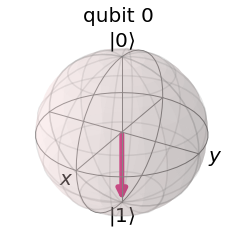

In [ ]:
# Executar a célula anterior
# Determinação do vetor de estados do registrador quântico
job = qk.execute(experiments = circuito, 
                 backend = qk.BasicAer.get_backend('statevector_simulator'))
print("Vetor de Estado do Registrador Quântico")
from qiskit.tools.visualization import plot_bloch_multivector
display(plot_bloch_multivector(job.result().get_statevector()))

In [ ]:
# Executar a célula anterior
# Determinação da matriz de transformação do circuito (até este vetor de estados)
job = qk.execute(experiments = circuito,
                 backend = qk.BasicAer.get_backend('unitary_simulator'))
print("Matriz de Transformação (até este ponto)")
print(job.result().get_unitary())

Matriz de Transformação (até este ponto)
[[0.+0.j 1.+0.j]
 [1.+0.j 0.+0.j]]


In [ ]:
# Executar a célula anterior
# Inserção de uma medida no registrador quântico
circuito.measure(qr, cr)
print("Circuito 1 - Registradores, gate X e medida no registrador quântico")
print(circuito.draw())

Circuito 1 - Registradores, gate X e medida no registrador quântico
        ┌───┐┌─┐
q815_0: ┤ X ├┤M├
        └───┘└╥┘
 c98: 1/══════╩═
              0 


In [ ]:
# Executar a célula anterior
# Execução de mil medidas no registrador quântico
print("Mil medidas do estado do registrador quântico")
job = qk.execute(experiments = circuito, 
                 backend = qk.BasicAer.get_backend('qasm_simulator'),
                 shots = 1000)

Mil medidas do estado do registrador quântico 



In [ ]:
# Executar a célula anterior
# Contagem dos resultados das medidas no registrador quântico
print("Contagem dos Resultados")
print(job.result().get_counts())

Contagem dos Resultados
{'1': 1000}


Histograma dos Resultados


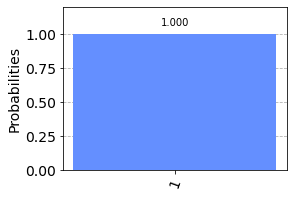

In [ ]:
# Executar a célula anterior
# Histograma dos resultados das medidas no registrador quântico
print("Histograma dos Resultados")
from qiskit.tools.visualization import plot_histogram
plot_histogram(data = job.result().get_counts(), figsize=(4,3))

**Exercício 2** Teletransporte do estado de um Qubit para outro.

In [ ]:
qk.BasicAer.backends()

[<QasmSimulatorPy('qasm_simulator')>,
 <StatevectorSimulatorPy('statevector_simulator')>,
 <UnitarySimulatorPy('unitary_simulator')>]

In [ ]:
import qiskit as qk

circuito = qk.QuantumCircuit(2,2)
#circuito.h(0)
circuito.cnot(0,1)
circuito.barrier()
print(circuito.draw())
job = qk.execute(experiments = circuito,
                 backend = qk.BasicAer.get_backend('unitary_simulator'))

import numpy as np
np.set_printoptions(precision=2) 
display(np.real(job.result().get_unitary()))

           ░ 
q_0: ──■───░─
     ┌─┴─┐ ░ 
q_1: ┤ X ├─░─
     └───┘ ░ 
c: 2/════════
             


array([[1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.]])

# Um programa com várias portas lógicas quânticas

In [ ]:
!pip install qiskit
import qiskit as qk

provider0 = qk.BasicAer
backend0 = provider0.get_backend('qasm_simulator')

# Chave de APIs obtida em https://quantum-computing.ibm.com
chave1 = '4ae468408574abb7fd53a78dd2e0a256b2be7cd68be45c0741e7c670c0947e57eb8'
chave2 = 'd71706bd6280aa83ec5ffb15137ba2f61ba77273bd12c9eaf196d00fabbe7'
chave = chave1 + chave2
qk.IBMQ.save_account(chave)

qk.IBMQ.load_account()

provider1 = qk.IBMQ.get_provider(hub='ibm-q', group='open', 
                                 project='main')
backend1 = provider1.get_backend('ibmq_qasm_simulator')

provider2 = qk.IBMQ.get_provider(hub='ibm-q-education', group='fgv-1', 
                                 project='ml-business-app')
backend2 = provider2.get_backend('ibmq_jakarta')

In [ ]:
list(qk.__qiskit_version__.items())

[('qiskit-terra', '0.17.4'),
 ('qiskit-aer', '0.8.2'),
 ('qiskit-ignis', '0.6.0'),
 ('qiskit-ibmq-provider', '0.13.1'),
 ('qiskit-aqua', '0.9.1'),
 ('qiskit', None),
 ('qiskit-nature', None),
 ('qiskit-finance', None),
 ('qiskit-optimization', None),
 ('qiskit-machine-learning', None)]

O primeiro circuito será composto de um Qubit e um bit. O Qubit é inicializado no estado $|{0}\rangle$, passa por uma porta X (NOT gate) e em seguida é feita uma medida. 


In [ ]:
q = qk.QuantumRegister(1)
c = qk.ClassicalRegister(1)
circuito1 = qk.QuantumCircuit(q, c)
circuito1.reset(q[0])
circuito1.measure(q, c)
print(circuito1)

           ┌─┐
q0_0: ─|0>─┤M├
           └╥┘
c0: 1/══════╩═
            0 


Abaixo executamos 10 amostras (*shots*) do circuito, no `backend2` o qual foi configurado para corresponder à maquina `ibmq_jakarta`. 

In [ ]:
jobBackend2 = qk.execute(circuito1, backend2, shots=10)

Lembre-se que neste caso, a impressão dos resultados deve ficar em outra célula, caso contrário o Jupyter notebook ficará "travado", a espera do job ser executado na máquina física correspondente.

In [ ]:
jobBackend2.result().get_counts()

{'0': 8, '1': 2}

Para os demais circuitos e simulações deste Jupyter notebook vamos executa-las no simulador local `BasicAer`, o qual foi configurado com o nome de `backend0`. 

In [ ]:
jobLocal0 = qk.execute(circuito1, backend0, shots=1000)
counts = jobLocal0.result().get_counts(circuito1)
print(counts)

{'0': 1000}


In [ ]:
q = qk.QuantumRegister(2)
c = qk.ClassicalRegister(2)
circuito2 = qk.QuantumCircuit(q, c)
circuito2.reset(q[0])
circuito2.measure(q[0], c[0])

circuito2.reset(q[1])
circuito2.measure(q[1], c[1])
circuito2.draw()

┌─┐   
q22_0: ─|0>─┤M├───
            └╥┘┌─┐
q22_1: ─|0>──╫─┤M├
             ║ └╥┘
c10: 2/══════╩══╩═
             0  1

In [ ]:
job2 = qk.execute(circuito2, backend0, shots=1000)
job2.result().get_counts()

{'00': 1000}

In [ ]:
q = qk.QuantumRegister(1)
c = qk.ClassicalRegister(1)
circuito3 = qk.QuantumCircuit(q, c)
circuito3.reset(q[0])
circuito3.h(q[0])
circuito3.measure(q[0],c[0])
print(circuito3.draw())
job3 = qk.execute(circuito3, backend0, shots=1000)
job3.result().get_counts()

            ┌───┐┌─┐
q40_0: ─|0>─┤ H ├┤M├
            └───┘└╥┘
c13: 1/═══════════╩═
                  0 


{'0': 492, '1': 508}

In [ ]:
q = qk.QuantumRegister(1)
c = qk.ClassicalRegister(1)
circuito4 = qk.QuantumCircuit(q, c)
circuito4.reset(q[0])
circuito4.x(q[0])
circuito4.h(q[0])
circuito4.h(q[0])
circuito4.measure(q[0], c[0])
print(circuito4)
job4 = qk.execute(circuito4, backend0, shots=1000)
job4.result().get_counts()

            ┌───┐┌───┐┌───┐┌─┐
q60_0: ─|0>─┤ X ├┤ H ├┤ H ├┤M├
            └───┘└───┘└───┘└╥┘
c16: 1/═════════════════════╩═
                            0 


{'1': 1000}

In [ ]:
q = qk.QuantumRegister(2)
c = qk.ClassicalRegister(2)
circuito5 = qk.QuantumCircuit(q,c)
circuito5.reset(q)
circuito5.h(q)
circuito5.measure(q,c)
print(circuito5)
job5 = qk.execute(circuito5, backend0, shots=1000)
job5.result().get_counts()

            ┌───┐┌─┐   
q93_0: ─|0>─┤ H ├┤M├───
            ├───┤└╥┘┌─┐
q93_1: ─|0>─┤ H ├─╫─┤M├
            └───┘ ║ └╥┘
c28: 2/═══════════╩══╩═
                  0  1 


{'00': 253, '01': 247, '10': 240, '11': 260}

In [ ]:
q = qk.QuantumRegister(2)
c = qk.ClassicalRegister(2)
circuito6 = qk.QuantumCircuit(q, c)
circuito6.reset(q)
circuito6.h(q[0])
circuito6.cnot(q[0],q[1])
circuito6.measure(q,c)
print(circuito6)
job6 = qk.execute(circuito6, backend0, shots=1000)
job6.result().get_counts()

             ┌───┐     ┌─┐   
q107_0: ─|0>─┤ H ├──■──┤M├───
             └───┘┌─┴─┐└╥┘┌─┐
q107_1: ─|0>──────┤ X ├─╫─┤M├
                  └───┘ ║ └╥┘
 c33: 2/════════════════╩══╩═
                        0  1 


{'00': 511, '11': 489}

# Um circuito mais difícil: O circuito de "tele-transporte" (do estado de Qubit para outro)

In [ ]:
# Instalação do Pacote Qiskit (executar uma vez por sessão)
!pip install qiskit

In [ ]:
# Importação da Biblioteca
import qiskit as qk

In [ ]:
# Criação de um circuito com 3 Qubits e 3 Bits
circuito = qk.QuantumCircuit(3,3)

In [ ]:
# Desenho do circuito até o momento
print(circuito.draw())

     
q_0: 
     
q_1: 
     
q_2: 
     
c: 3/
     


In [ ]:
# Criação de um backend para simulação do vetor de estados
sim_estados = qk.BasicAer.get_backend("statevector_simulator")

In [ ]:
# Criação de um job para visualização do vetor de estados neste
#  ponto do circuito
resultado = qk.execute(experiments = circuito,
                       backend = sim_estados).result()

In [ ]:
# Ajuste do formato de impressão da numpy
import numpy as np
np.set_printoptions(precision=3, suppress=True)

In [ ]:
# Impressão dos possíveis estados dos três qubits e
#  do vetor de estados correspondente. Observe que
#  o estado '000' aparece com o valor 1
print([np.binary_repr(x, width=3) for x in range(8)])
print(resultado.get_statevector(circuito))

['000', '001', '010', '011', '100', '101', '110', '111']
[1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]


In [ ]:
# Importação da função para desenho da Bloch Sphere 
from qiskit.tools.visualization import plot_bloch_multivector

Representação do vetor de estados pela Bloch Sphere


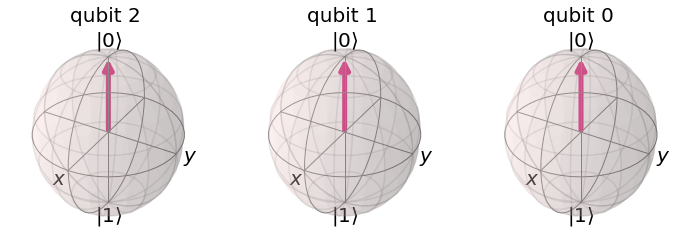

In [ ]:
# Apresentamos as esferas de Bloch com a ordem dos Qubits 
#  invertida (mais significativo à esquerda), para tornar
#  mais fácil a visualização da sequência de estados
print("Representação do vetor de estados pela Bloch Sphere")
plot_bloch_multivector(resultado.get_statevector(circuito),
                               reverse_bits=True)

In [ ]:
# Inserção de uma porta X (NOT gate) no Qubit 0
circuito.x(0)

In [ ]:
circuito.draw()

┌───┐
q_0: ┤ X ├
     └───┘
q_1: ─────
          
q_2: ─────
          
c: 3/═════

In [ ]:
# Inserção de uma barreira. Serve para preservar o circuito
# entre compilações e execuções.
circuito.barrier()

In [ ]:
circuito.draw()

┌───┐ ░ 
q_0: ┤ X ├─░─
     └───┘ ░ 
q_1: ──────░─
           ░ 
q_2: ──────░─
           ░ 
c: 3/════════

In [ ]:
# Vetor de estado do circuito após o gate X ser aplicado no
#  Qubit 0. 
resultado = qk.execute(experiments = circuito,
                       backend = sim_estados).result()
print([np.binary_repr(x,width=3) for x in range(8)])
print(resultado.get_statevector())

['000', '001', '010', '011', '100', '101', '110', '111']
[0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]


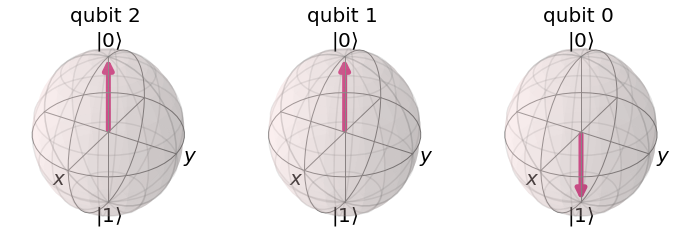

In [ ]:
#Observe a alteração do vetor na Bloch Sphere correspondente.
resultado = qk.execute(experiments = circuito, 
                       backend = sim_estados).result()
plot_bloch_multivector(resultado.get_statevector(), reverse_bits=True)

In [ ]:
# Colocar o Qubit 1 em superposição através de
#  um Hadamard Gate
circuito.h(1)

In [ ]:
circuito.draw()

┌───┐ ░      
q_0: ┤ X ├─░──────
     └───┘ ░ ┌───┐
q_1: ──────░─┤ H ├
           ░ └───┘
q_2: ──────░──────
           ░      
c: 3/═════════════

In [ ]:
# Vetor de Estados do Circuito após a colocação do Qubit
#  1 em sobreposição.
resultado = qk.execute(experiments = circuito,
                       backend = sim_estados).result()
print(resultado.get_statevector())

[0.   +0.j 0.707+0.j 0.   +0.j 0.707+0.j 0.   +0.j 0.   +0.j 0.   +0.j
 0.   +0.j]


In [ ]:
# Apresentando o statevector com valores inteiros.
#  Observe que a sobreposição no Qubit 1 faz com
#  que o vetor de estados tenha 1 nas posições do 
#  vetor relativas aos estados "001" e "011".
#  Lembre-se:
#  1o) As posições dos estados são: q2, q1, q0 e
#  2o) Os Qubits q2 e q0 estão em |0> e |1>
#  3o) O Qubit q1 está em sobreposição de |0> e |1>
resultado = qk.execute(experiments = circuito, 
                       backend = sim_estados).result()
print([np.binary_repr(x,width=3) for x in range(8)])
print(resultado.get_statevector()*np.sqrt(2))

['000', '001', '010', '011', '100', '101', '110', '111']
[0.+0.j 1.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]


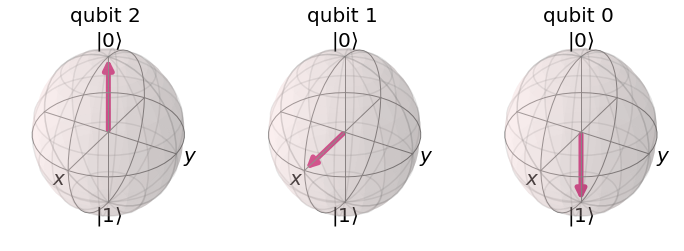

In [ ]:
plot_bloch_multivector(resultado.get_statevector(),
                       reverse_bits=True)

In [ ]:
# Entrelaçamento entre os qubits 1 e 2 através de um
#  CNOT gate com controle em q1 e alvo em q2. 
circuito.cnot(1,2)

In [ ]:
circuito.draw()

┌───┐ ░           
q_0: ┤ X ├─░───────────
     └───┘ ░ ┌───┐     
q_1: ──────░─┤ H ├──■──
           ░ └───┘┌─┴─┐
q_2: ──────░──────┤ X ├
           ░      └───┘
c: 3/══════════════════

In [ ]:
# O entrelaçamento faz os qubits q2 e q1 irem para |00> 
#  ou |11>. O qubit q0 continua em |1>. Logo os estados
#  do conjunto ficam |001> e |111>
resultado = qk.execute(circuito, sim_estados).result()
print([np.binary_repr(x, width=3) for x in range(8)])
print((resultado.get_statevector()*np.sqrt(2)))

['000', '001', '010', '011', '100', '101', '110', '111']
[0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j]


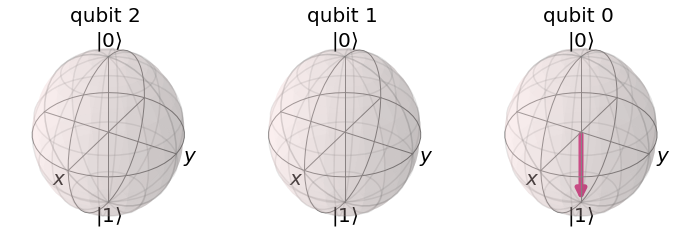

In [ ]:
# Tal como era de se esperar, não é mais possível mostrar
#  o estado de cada Qubit entrelaçado de forma individual
#  Observe que o Qubit 2 por exemplo não está mais no 
#  estado individual |0> em conjunto com o estado |0> do
#  Qubit 1. Os Qubits 2 e 1 formam agora um bloco 
#  indivisível o qual está em sobreposição de |00> e |11>
resultado = qk.execute(circuito, sim_estados).result()
plot_bloch_multivector(resultado.get_statevector(),
                       reverse_bits=True)

In [ ]:
# CNOT gate entre o Qubit q0 (controle) e
#  o Qubit q1 (alvo)
circuito.cnot(0,1)

In [ ]:
circuito.draw()

┌───┐ ░                
q_0: ┤ X ├─░─────────────■──
     └───┘ ░ ┌───┐     ┌─┴─┐
q_1: ──────░─┤ H ├──■──┤ X ├
           ░ └───┘┌─┴─┐└───┘
q_2: ──────░──────┤ X ├─────
           ░      └───┘     
c: 3/═══════════════════════

In [ ]:
# Observe agora o resultado da aplicação de um CNOT 
#  gate em q0 (controle) e q1 (alvo). O estado inicial
#  era |q2, q1, q0> = |001> e |111>.  O CNOT com controle
#  em q0 inverte o estado de q1. Isto vai gerar como 
#  resultado |011> e |101>. O interessante aqui é que 
#  foi alterado o estado de um dos Qubits previamente
#  entrelaçados, mas isto não se refletiu no Qubit q2.

# Isto é importante. Pode-se afetar o estado de um dos
#  Qubits entrelaçado. Isto não vai se refletir no 
#  estado do 2o Qubit. O entrelaçamento só "aparece"
#  quando efetuamos uma medida. Isto quer dizer que
#  caso tivéssemos feito uma medida agora, o 
#  entrelaçamento entre q1 e q2 iria se manifestar 
#  pelos estados 01 e 10, os únicos que iriam
#  aparecer na saida.

resultado = qk.execute(circuito, sim_estados).result()
print([np.binary_repr(x,width=3) for x in range(8)])
print(resultado.get_statevector()*np.sqrt(2))

['000', '001', '010', '011', '100', '101', '110', '111']
[0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j]


In [ ]:
# Aplicação de um Hadamard gate em q0
circuito.h(0)

In [ ]:
circuito.draw()

┌───┐ ░                ┌───┐
q_0: ┤ X ├─░─────────────■──┤ H ├
     └───┘ ░ ┌───┐     ┌─┴─┐└───┘
q_1: ──────░─┤ H ├──■──┤ X ├─────
           ░ └───┘┌─┴─┐└───┘     
q_2: ──────░──────┤ X ├──────────
           ░      └───┘          
c: 3/════════════════════════════

In [ ]:
circuito.barrier()

In [ ]:
circuito.draw()

┌───┐ ░                ┌───┐ ░ 
q_0: ┤ X ├─░─────────────■──┤ H ├─░─
     └───┘ ░ ┌───┐     ┌─┴─┐└───┘ ░ 
q_1: ──────░─┤ H ├──■──┤ X ├──────░─
           ░ └───┘┌─┴─┐└───┘      ░ 
q_2: ──────░──────┤ X ├───────────░─
           ░      └───┘           ░ 
c: 3/═══════════════════════════════

In [ ]:
# Criação de uma função lambda para geração dos
#  estados binários possíveis dos três qubits
estados = lambda n : [np.binary_repr(x, width=n) for x in range(2**n)]
estados(3)

['000', '001', '010', '011', '100', '101', '110', '111']

In [ ]:
resultado = qk.execute(circuito,
               qk.BasicAer.get_backend('statevector_simulator')).result()
print(estados(3))
print(resultado.get_statevector()*2)

['000', '001', '010', '011', '100', '101', '110', '111']
[ 0.+0.j  0.+0.j  1.-0.j -1.+0.j  1.-0.j -1.+0.j  0.+0.j  0.+0.j]


In [ ]:
# Duas medidas, em q0 e q1
circuito.measure(0,0)

In [ ]:
circuito.draw()

┌───┐ ░                ┌───┐ ░ ┌─┐
q_0: ┤ X ├─░─────────────■──┤ H ├─░─┤M├
     └───┘ ░ ┌───┐     ┌─┴─┐└───┘ ░ └╥┘
q_1: ──────░─┤ H ├──■──┤ X ├──────░──╫─
           ░ └───┘┌─┴─┐└───┘      ░  ║ 
q_2: ──────░──────┤ X ├───────────░──╫─
           ░      └───┘           ░  ║ 
c: 3/════════════════════════════════╩═
                                     0

In [ ]:
circuito.measure(1,1)

In [ ]:
circuito.draw()

┌───┐ ░                ┌───┐ ░ ┌─┐   
q_0: ┤ X ├─░─────────────■──┤ H ├─░─┤M├───
     └───┘ ░ ┌───┐     ┌─┴─┐└───┘ ░ └╥┘┌─┐
q_1: ──────░─┤ H ├──■──┤ X ├──────░──╫─┤M├
           ░ └───┘┌─┴─┐└───┘      ░  ║ └╥┘
q_2: ──────░──────┤ X ├───────────░──╫──╫─
           ░      └───┘           ░  ║  ║ 
c: 3/════════════════════════════════╩══╩═
                                     0  1

In [ ]:
circuito.barrier()

In [ ]:
circuito.draw()

┌───┐ ░                ┌───┐ ░ ┌─┐    ░ 
q_0: ┤ X ├─░─────────────■──┤ H ├─░─┤M├────░─
     └───┘ ░ ┌───┐     ┌─┴─┐└───┘ ░ └╥┘┌─┐ ░ 
q_1: ──────░─┤ H ├──■──┤ X ├──────░──╫─┤M├─░─
           ░ └───┘┌─┴─┐└───┘      ░  ║ └╥┘ ░ 
q_2: ──────░──────┤ X ├───────────░──╫──╫──░─
           ░      └───┘           ░  ║  ║  ░ 
c: 3/════════════════════════════════╩══╩════
                                     0  1

In [ ]:
# Para avaliar os resultados das medidas nos qubits q0 e q1
#  criamos um novo simulador, agora de medidas
sim_valores = qk.BasicAer.get_backend('qasm_simulator')

In [ ]:
# Para apresentar os resultados das medições, vamos utilizar
#  outro recurso gráfico da Qiskit: os histogramas de resultados
from qiskit.tools.visualization import plot_histogram

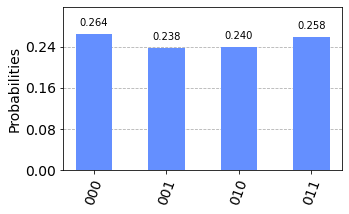

In [ ]:
resultado = qk.execute(circuito, sim_valores, shots=1000).result()
plot_histogram(resultado.get_counts(), figsize=(5,3))

In [ ]:
# Em seguida acrescentamos um CNOT em (1,2)
#  1 = controle, 2 = alvo
circuito.cnot(1,2)

In [ ]:
circuito.draw()

┌───┐ ░                ┌───┐ ░ ┌─┐    ░      
q_0: ┤ X ├─░─────────────■──┤ H ├─░─┤M├────░──────
     └───┘ ░ ┌───┐     ┌─┴─┐└───┘ ░ └╥┘┌─┐ ░      
q_1: ──────░─┤ H ├──■──┤ X ├──────░──╫─┤M├─░───■──
           ░ └───┘┌─┴─┐└───┘      ░  ║ └╥┘ ░ ┌─┴─┐
q_2: ──────░──────┤ X ├───────────░──╫──╫──░─┤ X ├
           ░      └───┘           ░  ║  ║  ░ └───┘
c: 3/════════════════════════════════╩══╩═════════
                                     0  1

In [ ]:
 # Com sempre vamos observar o vetor de estados
 resultado = qk.execute(circuito, sim_estados).result()
 print(estados(3))
 print(resultado.get_statevector())

['000', '001', '010', '011', '100', '101', '110', '111']
[ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j -1.+0.j  0.+0.j  0.+0.j]


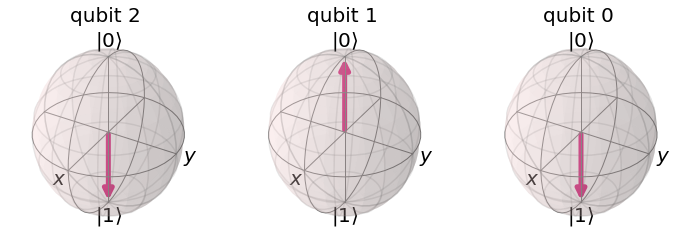

In [ ]:
plot_bloch_multivector(resultado.get_statevector(),
                       reverse_bits = True)

In [ ]:
# Por último incluimos um Z gate entre as portas 
#  q0 e q2 ...
circuito.cz(0,2)

In [ ]:
circuito.draw()

┌───┐ ░                ┌───┐ ░ ┌─┐    ░         
q_0: ┤ X ├─░─────────────■──┤ H ├─░─┤M├────░───────■─
     └───┘ ░ ┌───┐     ┌─┴─┐└───┘ ░ └╥┘┌─┐ ░       │ 
q_1: ──────░─┤ H ├──■──┤ X ├──────░──╫─┤M├─░───■───┼─
           ░ └───┘┌─┴─┐└───┘      ░  ║ └╥┘ ░ ┌─┴─┐ │ 
q_2: ──────░──────┤ X ├───────────░──╫──╫──░─┤ X ├─■─
           ░      └───┘           ░  ║  ║  ░ └───┘   
c: 3/════════════════════════════════╩══╩════════════
                                     0  1

In [ ]:
# ... e uma medida em no Qubit 2
circuito.measure(2,2)

In [ ]:
circuito.draw()

┌───┐ ░                ┌───┐ ░ ┌─┐    ░            
q_0: ┤ X ├─░─────────────■──┤ H ├─░─┤M├────░───────■────
     └───┘ ░ ┌───┐     ┌─┴─┐└───┘ ░ └╥┘┌─┐ ░       │    
q_1: ──────░─┤ H ├──■──┤ X ├──────░──╫─┤M├─░───■───┼────
           ░ └───┘┌─┴─┐└───┘      ░  ║ └╥┘ ░ ┌─┴─┐ │ ┌─┐
q_2: ──────░──────┤ X ├───────────░──╫──╫──░─┤ X ├─■─┤M├
           ░      └───┘           ░  ║  ║  ░ └───┘   └╥┘
c: 3/════════════════════════════════╩══╩═════════════╩═
                                     0  1             2

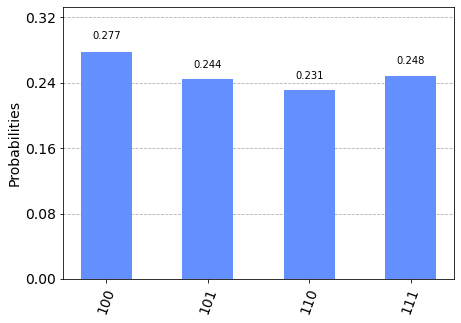

In [ ]:
# Executando o circuito e obtendo as medidas
resultado = qk.execute(circuito, sim_valores, shots=1000).result()
plot_histogram(resultado.get_counts())

# Qiskit - Fourier Checking

In [ ]:
import qiskit.quantum_info as qi
from qiskit.circuit.library import FourierChecking
from qiskit.visualization import plot_histogram

In [ ]:
f = [1,-1,-1,-1]
g = [1,1,-1,-1]

In [ ]:
circ = FourierChecking(f=f, g=g)
circ.draw()

┌───┐┌───────────────────────┐┌───┐┌──────────────────────┐┌───┐
q_0: ┤ H ├┤0                      ├┤ H ├┤0                     ├┤ H ├
     ├───┤│  DIAGONAL(1,-1,-1,-1) │├───┤│  DIAGONAL(1,1,-1,-1) │├───┤
q_1: ┤ H ├┤1                      ├┤ H ├┤1                     ├┤ H ├
     └───┘└───────────────────────┘└───┘└──────────────────────┘└───┘

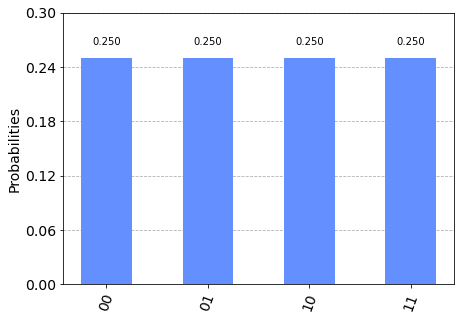

In [ ]:
zero = qi.Statevector.from_label('00')
sv = zero.evolve(circ)
probs = sv.probabilities_dict()
plot_histogram(probs)